In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [2]:
# load datasets for two subjects, Math and Portuguese
maths = pd.read_csv("student-mat.csv", sep=';')
portuguese = pd.read_csv("student-por.csv", sep=';')

In [4]:
# merge datasets
df = pd.concat([maths,portuguese])

In [5]:
maths.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
portuguese.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
portuguese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [10]:
# merge datasets
df = pd.concat([maths,portuguese])

In [11]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [12]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [13]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

C:\Users\Dr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Student')

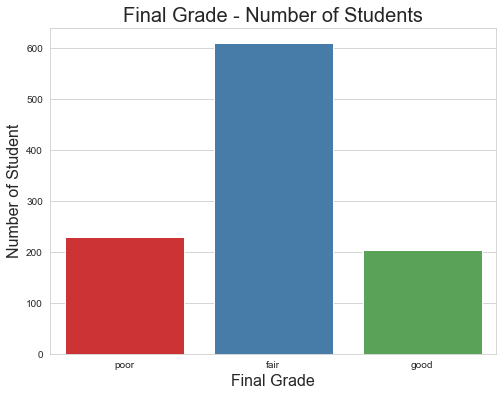

In [16]:
# EDA
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

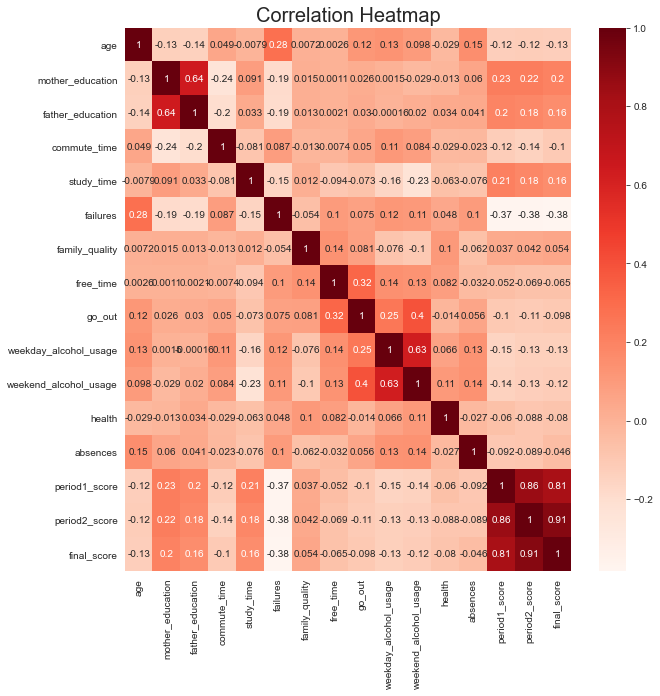

In [17]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [18]:
# students in a romantic relationship and those not in a relationship performance
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

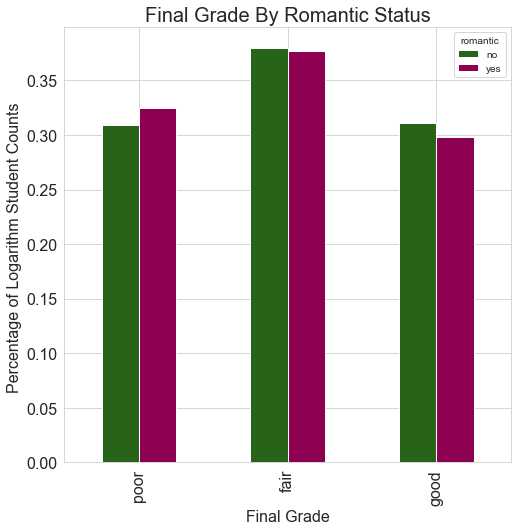

In [19]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [20]:
#Hyphothesis Testing confirmed, romantic status has a significant correlation with final grade.
# chi-square test result -- significant!
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.038810128743959726

In [21]:
#Final Grade By Alcohol Consumption
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

<ipython-input-22-57783463b5f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_alcohol_usage']=good.weekend_alcohol_usage
<ipython-input-22-57783463b5f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_alcohol_usage']=poor.weekend_alcohol_usage


Text(0.5, 0, 'Level of Alcohol Consumption')

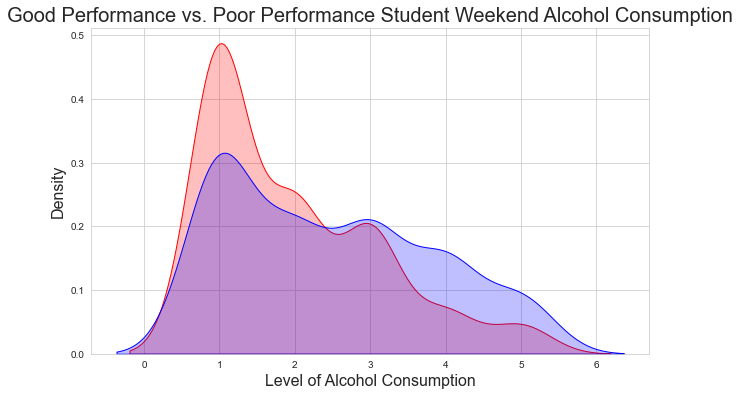

In [22]:
# create good student dataframe
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

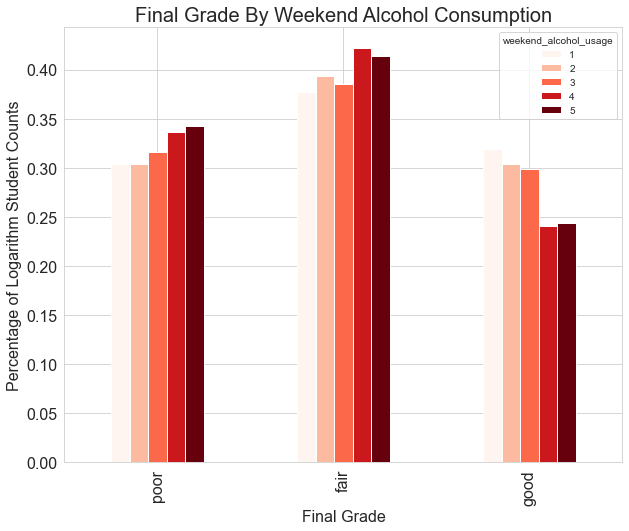

In [23]:
alc_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [24]:
#Hyphothesis Testing confirmed, weekend alcohol consumption has a significant correlation with final grade
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.007592294056368298

In [25]:
#parents' education level influence student performance
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

<ipython-input-25-b47c0092fc8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_father_education'] = good.father_education
<ipython-input-25-b47c0092fc8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_father_education'] = poor.father_education
<ipython-input-25-b47c0092fc8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Text(0.5, 0, 'Father Education Level')

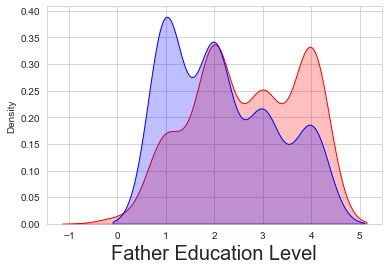

In [26]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)

Text(0.5, 0, 'Mother Education Level')

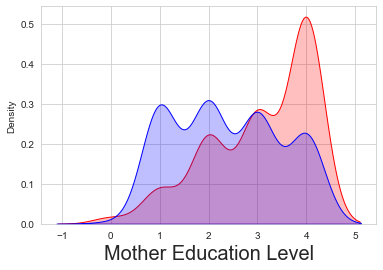

In [27]:
# see the difference between good and poor performers' mother education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)

In [28]:
#OLS tells that parents' education level has a positive correlation with students' final score. 
#Comparatively, mother's education level has bigger influence than father's education level!
# use OLS to see coefficients
X_edu = df[['mother_education','father_education']]
y_edu = df.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            final_score   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              2287.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:19:03   Log-Likelihood:                         -3194.8
No. Observations:                1044   AIC:                                      6394.
Df Residuals:                    1042   BIC:                                      6403.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.4078      0.166     14.527      0.000       2.083       2.733
father_education     1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Frequency of Going Out')

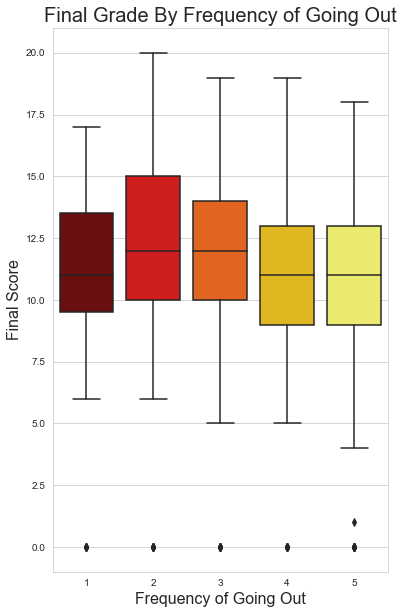

In [29]:
#Final Grade By Frequency Of Going Out
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

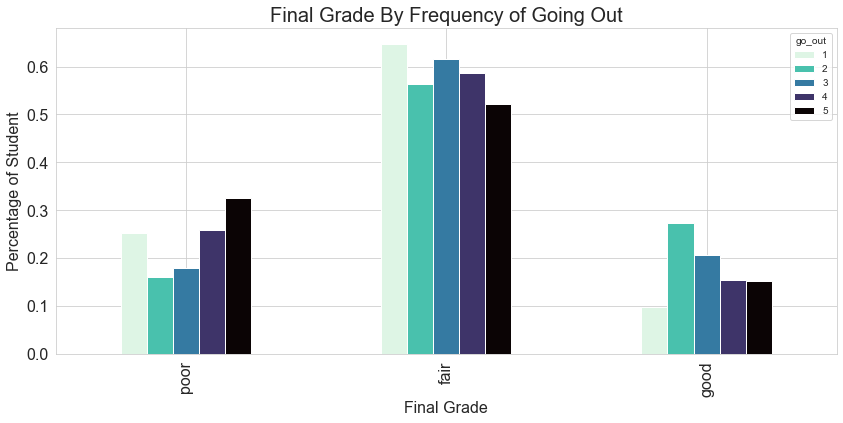

In [30]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [31]:
#Hyphothesis Testing confirmed, the frequency of going out with friends has a significant correlation with students' final performance.
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

4.365198328282194e-05

Text(0.5, 0, 'Age')

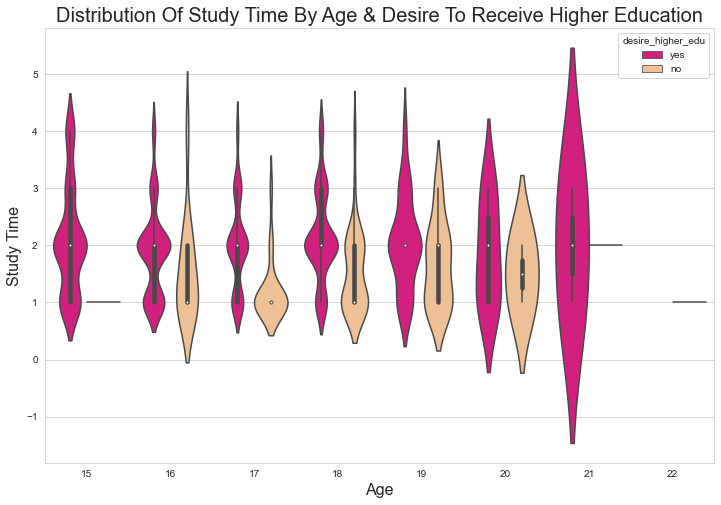

In [32]:
#Final Grade By Desire To Go To College
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [33]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

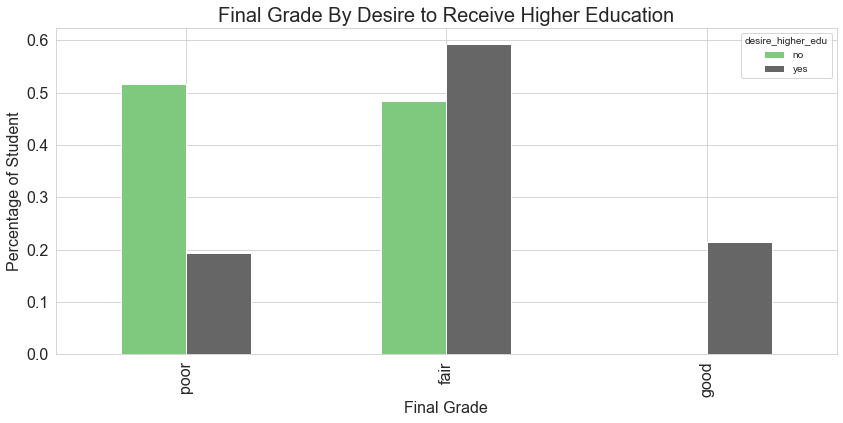

In [42]:
higher_perc.plot.bar(colormap="Accent", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [43]:
#Hyphothesis Testing confirmed, the desire of going to college has a significant correlation with students' final performance.
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

2.2470914018413168e-13

In [44]:
#Final Grade By Living Area
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

C:\Users\Dr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


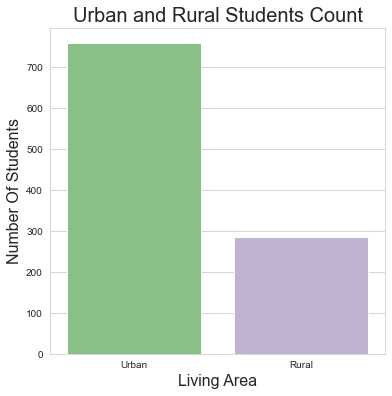

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(df.address, palette='Accent')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [47]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

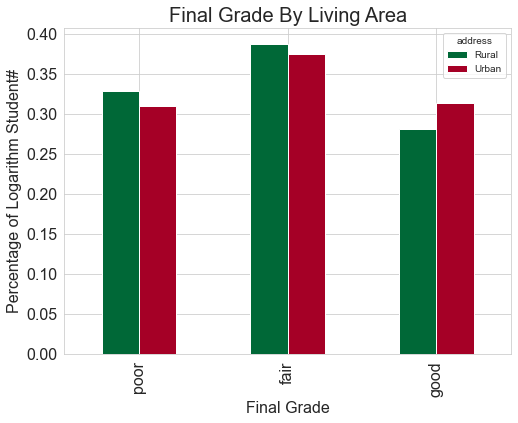

In [48]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [50]:
#Hyphothesis Testing confirmed, living area has a significant correlation with students' final performance.
# chi-square test result -- significant!
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.007608910517873602

In [51]:
# explore other variables via OLS
dfl = df.copy()
X_ols = dfl.drop(['period1_score', 'period2_score', 'final_score','final_grade', 'failures','study_time','absences'], axis=1)
X_ols = pd.get_dummies(X_ols)

In [52]:
mod = sm.OLS(df.final_score, X_ols)
mod = mod.fit()

In [53]:
#Prepare Dataset for Modelling
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [54]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [56]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [57]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [58]:
# see total number of features
len(list(X_train))

58

In [59]:
#Decision Tree Classification
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

18    0.901274
19    0.901274
20    0.901274
dtype: float64

In [60]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.8890410958904109 , Cross Validation Score : 0.9012738853503185


In [61]:
#Random Forest Classification
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

5     0.89172
24    0.89172
43    0.89172
45    0.89172
56    0.89172
dtype: float64

In [62]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

3    0.898089
dtype: float64

In [63]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Raondom Forest Model Score : 0.9767123287671233 , Cross Validation Score : 0.8821656050955414


In [64]:
#Support Vector Classification
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.8698630136986302 , Cross Validation Score : 0.9012738853503185


In [65]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [66]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

1     0.898089
2     0.898089
3     0.901274
4     0.901274
5     0.216561
6     0.216561
7     0.216561
8     0.216561
9     0.216561
10    0.216561
11    0.894904
12    0.216561
13    0.216561
14    0.888535
15    0.216561
16    0.216561
17    0.216561
18    0.216561
19    0.216561
20    0.216561
21    0.216561
22    0.216561
23    0.216561
24    0.213376
25    0.216561
26    0.216561
27    0.216561
28    0.783439
29    0.783439
30    0.786624
31    0.777070
32    0.808917
33    0.796178
34    0.216561
35    0.216561
36    0.216561
37    0.216561
38    0.681529
39    0.652866
40    0.627389
41    0.614650
42    0.633758
43    0.684713
44    0.735669
45    0.866242
46    0.834395
47    0.856688
48    0.869427
49    0.216561
50    0.863057
51    0.856688
52    0.856688
53    0.863057
54    0.863057
55    0.863057
56    0.866242
57         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

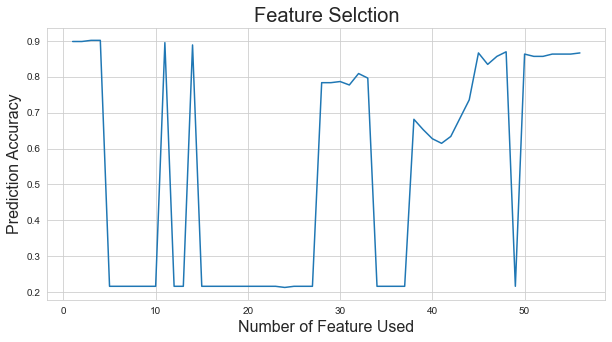

In [67]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [68]:
ks.where(ks==ks.max()).dropna()

3    0.901274
4    0.901274
dtype: float64

In [69]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.8863013698630137 , Cross Validation Score : 0.21656050955414013


In [71]:
#Ada Boost Classification
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.8602739726027397 , Cross Validation Score : 0.8726114649681529


In [72]:
#Stochastic Gradient Descent Classification
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.8328767123287671 , Cross Validation Score : 0.8375796178343949
